目标：
设计一个5层全连接网络是实下函数 $:y=x^2+2x-$3

# 无框架

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class NeuralNetwork:
    def __init__(self, learning_rate = 0.01):
        self.learning_rate = learning_rate
        # np.random.seed(5201314)
        # x(1, 20) w(10, 1) -> (10, 20)
        self.W1 = np.random.randn(10, 1) * np.sqrt(2.0 / 1)  
        self.b1 = np.zeros((10, 1))
        # x2(10, 10) w2(10, 10) -> (10, 10)
        self.W2 = np.random.randn(10, 10) * np.sqrt(2.0 / 10)
        self.b2 = np.zeros((10, 1))
        self.W3 = np.random.randn(10, 10) * np.sqrt(2.0 / 10)
        self.b3 = np.zeros((10, 1))
        self.W4 = np.random.randn(10, 10) * np.sqrt(2.0 / 10)
        self.b4 = np.zeros((10, 1))
        self.W5 = np.random.randn(1, 10) * np.sqrt(2.0 / 10)
        self.b5 = np.zeros((1, 1))
        
    def activation(self, x):
        return np.maximum(0, x)

    def activation_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def dense(self, a_in, W, b):
        Z = np.matmul(W, a_in) + b
        a_out = self.activation(Z)
        return Z, a_out

    def sequential(self, x):
        self.z1, self.a1 = self.dense(x, self.W1, self.b1)
        self.z2, self.a2 = self.dense(self.a1, self.W2, self.b2)
        self.z3, self.a3 = self.dense(self.a2, self.W3, self.b3)
        self.z4, self.a4 = self.dense(self.a3, self.W4, self.b4)
        self.z5 = np.dot(self.W5, self.a4) + self.b5
        self.a5 = self.z5  # 直接作为输出
        return self.a5

    def backward(self, X, y, output):
        m = X.shape[1]
        # 计算输出层的误差
        delta5 = (output - y)
        delta4 = np.dot(self.W5.T, delta5) * self.activation_derivative(self.z4)
        delta3 = np.dot(self.W4.T, delta4) * self.activation_derivative(self.z3)
        delta2 = np.dot(self.W3.T, delta3) * self.activation_derivative(self.z2)
        delta1 = np.dot(self.W2.T, delta2) * self.activation_derivative(self.z1)

        dW5 = (1 / m) * np.dot(delta5, self.a4.T)
        db5 = (1 / m) * np.sum(delta5, axis=1, keepdims=True)
        dW4 = (1 / m) * np.dot(delta4, self.a3.T)
        db4 = (1 / m) * np.sum(delta4, axis=1, keepdims=True)
        dW3 = (1 / m) * np.dot(delta3, self.a2.T)
        db3 = (1 / m) * np.sum(delta3, axis=1, keepdims=True)
        dW2 = (1 / m) * np.dot(delta2, self.a1.T)
        db2 = (1 / m) * np.sum(delta2, axis=1, keepdims=True)
        dW1 = (1 / m) * np.dot(delta1, X.T)
        db1 = (1 / m) * np.sum(delta1, axis=1, keepdims=True)

        return dW5, db5, dW4, db4, dW3, db3, dW2, db2, dW1, db1

    def update_parameters(self, dW5, db5, dW4, db4, dW3, db3, dW2, db2, dW1, db1):
        self.W5 -= self.learning_rate * dW5
        self.b5 -= self.learning_rate * db5
        self.W4 -= self.learning_rate * dW4
        self.b4 -= self.learning_rate * db4
        self.W3 -= self.learning_rate * dW3
        self.b3 -= self.learning_rate * db3
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1

    def fit(self, X, y, epochs=100000):
        for i in range(epochs):
            output = self.sequential(X)
            dW5, db5, dW4, db4, dW3, db3, dW2, db2, dW1, db1 = self.backward(X, y, output)
            self.update_parameters(dW5, db5, dW4, db4, dW3, db3, dW2, db2, dW1, db1)
            if i % 1000 == 0:
                print(f'Epoch {i}: Loss {np.mean((output - y)**2)}')

In [3]:
# 生成样本数据
X = np.linspace(-10, 10, 200).reshape(-1, 1)
y = X**2 + 2*X - 3

# 创建并训练神经网络
nn = NeuralNetwork(learning_rate=0.001)
print(X.T.shape)
nn.fit(X.T, y.T)

(1, 200)
Epoch 0: Loss 2423.8942557514574
Epoch 1000: Loss 1124.7175985320366
Epoch 2000: Loss 108.92923835545992
Epoch 3000: Loss 89.07359459360647
Epoch 4000: Loss 44.44948770112182
Epoch 5000: Loss 23.823115270000862
Epoch 6000: Loss 18.773809080611933
Epoch 7000: Loss 16.89674660969606
Epoch 8000: Loss 12.753836475862979
Epoch 9000: Loss 9.174673036692877
Epoch 10000: Loss 4.161490394815696
Epoch 11000: Loss 5.982745606190174
Epoch 12000: Loss 4.292706752121765
Epoch 13000: Loss 2.0777968072875206
Epoch 14000: Loss 2.0036689614527132
Epoch 15000: Loss 1.6364359630204235
Epoch 16000: Loss 1.9917047790838094
Epoch 17000: Loss 1.3841705917983496
Epoch 18000: Loss 10.279579523858809
Epoch 19000: Loss 3.3629879481102467
Epoch 20000: Loss 0.5653940092672886
Epoch 21000: Loss 2.8151890656104865
Epoch 22000: Loss 1.1950486970832908
Epoch 23000: Loss 2.747201842666955
Epoch 24000: Loss 0.40429734240024373
Epoch 25000: Loss 1.1045944156238017
Epoch 26000: Loss 1.038746185587388
Epoch 27000: 

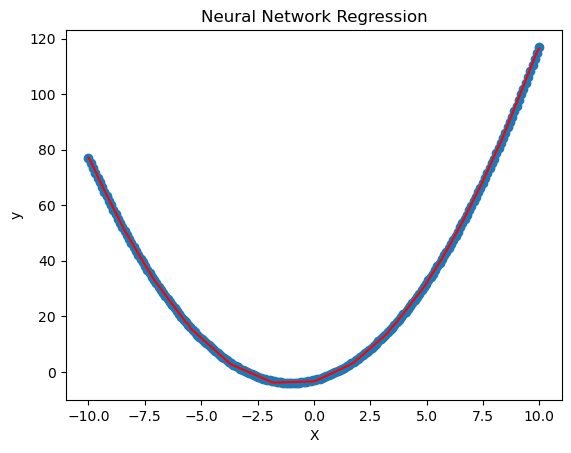

In [4]:
# 生成测试样本数据
X_test = np.linspace(-10, 10, 200).reshape(-1, 1)
y_test = X**2 + 2*X - 3

# 可视化结果
plt.scatter(X_test, y_test)
plt.plot(X_test, nn.sequential(X_test.T).flatten(), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Neural Network Regression')
plt.show()

# Pytorch 版本

In [23]:
# Numerical Operations
import math
import numpy as np

# Reading/Writing Data
import pandas as pd
import os
import csv

# For Progress Bar
from tqdm import tqdm

# Pytorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split

# For plotting learning curve
from torch.utils.tensorboard import SummaryWriter

In [33]:
def train_valid_split(data_set, valid_ratio, seed):
    '''Split provided training data into training set and validation set'''
    valid_set_size = int(valid_ratio * len(data_set))
    train_set_size = len(data_set) - valid_set_size
    train_set, valid_set = random_split(data_set, [train_set_size, valid_set_size], generator=torch.Generator().manual_seed(seed))
    return np.array(train_set), np.array(valid_set)

def predict(test_loader, model, device):
    model.eval() # Set your model to evaluation mode.
    preds = []
    for x in tqdm(test_loader):
        x = x.to(device)
        with torch.no_grad():
            pred = model(x)
            preds.append(pred.detach().cpu())
    preds = torch.cat(preds, dim=0).numpy()
    return preds

In [25]:
class MyDataset(Dataset):
    '''
    x: Features.
    y: Targets, if none, do prediction.
    '''
    def __init__(self, x, y=None):
        if y is None:
            self.y = y
        else:
            self.y = torch.FloatTensor(y)
        self.x = torch.FloatTensor(x)

    def __getitem__(self, idx):
        if self.y is None:
            return self.x[idx]
        else:
            return self.x[idx], self.y[idx]

    def __len__(self):
        return len(self.x)

In [26]:
class My_Model(nn.Module):
    def __init__(self, input_dim):
        super(My_Model, self).__init__()
        # print(input_dim)
        # TODO: modify model's structure, be aware of dimensions.
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 10),
            nn.ReLU(),
            nn.Linear(10, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        )

    def forward(self, x):
        x = self.layers(x)
        x = x.squeeze(1) # (B, 1) -> (B)
        return x

In [27]:
def trainer(train_loader, valid_loader, model, config, device):

    criterion = nn.MSELoss(reduction='mean') # Define your loss function, do not modify this.

    # Define your optimization algorithm.
    # TODO: Please check https://pytorch.org/docs/stable/optim.html to get more available algorithms.
    # TODO: L2 regularization (optimizer(weight decay...) or implement by your self).
    optimizer = torch.optim.SGD(model.parameters(), lr=config['learning_rate'], momentum=0.9)

    writer = SummaryWriter() # Writer of tensoboard.

    if not os.path.isdir('./models'):
        os.mkdir('./models') # Create directory of saving models.

    n_epochs, best_loss, step, early_stop_count = config['n_epochs'], math.inf, 0, 0

    for epoch in range(n_epochs):
        model.train() # Set your model to train mode.
        loss_record = []

        # tqdm is a package to visualize your training progress.
        train_pbar = tqdm(train_loader, position=0, leave=True)

        for x, y in train_pbar:
            optimizer.zero_grad()               # Set gradient to zero.
            x, y = x.to(device), y.to(device)   # Move your data to device.
            pred = model(x)
            loss = criterion(pred, y)
            loss.backward()                     # Compute gradient(backpropagation).
            optimizer.step()                    # Update parameters.
            step += 1
            loss_record.append(loss.detach().item())

            # Display current epoch number and loss on tqdm progress bar.
            train_pbar.set_description(f'Epoch [{epoch+1}/{n_epochs}]')
            train_pbar.set_postfix({'loss': loss.detach().item()})

        mean_train_loss = sum(loss_record)/len(loss_record)
        writer.add_scalar('Loss/train', mean_train_loss, step)

        model.eval() # Set your model to evaluation mode.
        loss_record = []
        for x, y in valid_loader:
            x, y = x.to(device), y.to(device)
            with torch.no_grad():
                pred = model(x)
                loss = criterion(pred, y)

            loss_record.append(loss.item())

        mean_valid_loss = sum(loss_record)/len(loss_record)
        print(f'Epoch [{epoch+1}/{n_epochs}]: Train loss: {mean_train_loss:.4f}, Valid loss: {mean_valid_loss:.4f}')
        writer.add_scalar('Loss/valid', mean_valid_loss, step)

        if mean_valid_loss < best_loss:
            best_loss = mean_valid_loss
            torch.save(model.state_dict(), config['save_path']) # Save your best model
            print('Saving model with loss {:.3f}...'.format(best_loss))
            early_stop_count = 0
        else:
            early_stop_count += 1

        if early_stop_count >= config['early_stop']:
            print('\nModel is not improving, so we halt the training session.')
            return


`config` contains hyper-parameters for training and the path to save your model.

In [28]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
config = {
    'seed': 5201314,      # Your seed number, you can pick your lucky number. :)
    'select_all': True,   # Whether to use all features.
    'valid_ratio': 0.2,   # validation_size = train_size * valid_ratio
    'n_epochs': 3000,     # Number of epochs.
    'batch_size': 256,
    'learning_rate': 1e-5,
    'early_stop': 400,    # If model has not improved for this many consecutive epochs, stop training.
    'save_path': './models/model.ckpt'  # Your model will be saved here.
}

In [29]:
X = np.linspace(-500, 500, 2200).reshape(-1, 1)
y = X**2 + 2*X - 3
data = np.append(X, y, axis=1)
train_data, valid_data = train_valid_split(data, config['valid_ratio'], config['seed'])
X_test = np.linspace(-500, 500, 2000).reshape(-1, 1)
x_train, x_valid = train_data[:,:-1], valid_data[:,:-1]
y_train, y_valid = train_data[:,-1], valid_data[:,-1]

print(f"""train_data size: {train_data.shape}
valid_data size: {valid_data.shape}
test_data size: {X_test.shape}""")

train_dataset, valid_dataset, test_dataset =MyDataset(x_train, y_train), \
                                            MyDataset(x_valid, y_valid), \
                                        MyDataset(X_test)

# Pytorch data loader loads pytorch dataset into batches.
train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True, pin_memory=True)
valid_loader = DataLoader(valid_dataset, batch_size=config['batch_size'], shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=config['batch_size'], shuffle=False, pin_memory=True)

train_data size: (1760, 2)
valid_data size: (440, 2)
test_data size: (2000, 1)


In [30]:
model = My_Model(input_dim=x_train.shape[1]).to(device) # put your model and data on the same computation device.
trainer(train_loader, valid_loader, model, config, device)

Epoch [1/3000]: 100%|██████████████████████| 7/7 [00:00<00:00, 65.43it/s, loss=4.24e+14]


Epoch [1/3000]: Train loss: 32548837412297863331840.0000, Valid loss: 598439402405888.0000
Saving model with loss 598439402405888.000...


Epoch [2/3000]: 100%|█████████████████████| 7/7 [00:00<00:00, 103.51it/s, loss=1.67e+15]


Epoch [2/3000]: Train loss: 1143598374153654.7500, Valid loss: 1823024168828928.0000


Epoch [3/3000]: 100%|█████████████████████| 7/7 [00:00<00:00, 114.80it/s, loss=2.55e+15]


Epoch [3/3000]: Train loss: 2210968997649261.7500, Valid loss: 2640574616174592.0000


Epoch [4/3000]: 100%|█████████████████████| 7/7 [00:00<00:00, 140.16it/s, loss=3.04e+15]


Epoch [4/3000]: Train loss: 2853893830606848.0000, Valid loss: 3080819769868288.0000


Epoch [5/3000]: 100%|██████████████████████| 7/7 [00:00<00:00, 47.07it/s, loss=3.28e+15]


Epoch [5/3000]: Train loss: 3187833443450880.0000, Valid loss: 3298902908338176.0000


Epoch [6/3000]: 100%|██████████████████████| 7/7 [00:00<00:00, 97.62it/s, loss=3.39e+15]


Epoch [6/3000]: Train loss: 3349644265539876.5000, Valid loss: 3400785975050240.0000


Epoch [7/3000]: 100%|█████████████████████| 7/7 [00:00<00:00, 157.49it/s, loss=3.44e+15]


Epoch [7/3000]: Train loss: 3423609086129883.5000, Valid loss: 3444966021922816.0000


Epoch [8/3000]: 100%|█████████████████████| 7/7 [00:00<00:00, 158.39it/s, loss=3.46e+15]


Epoch [8/3000]: Train loss: 3454250955084361.0000, Valid loss: 3461254416957440.0000


Epoch [9/3000]: 100%|█████████████████████| 7/7 [00:00<00:00, 167.10it/s, loss=3.47e+15]


Epoch [9/3000]: Train loss: 3463903165471597.5000, Valid loss: 3463988834729984.0000


Epoch [10/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 162.91it/s, loss=3.46e+15]


Epoch [10/3000]: Train loss: 3463456680612425.0000, Valid loss: 3460297578774528.0000


Epoch [11/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 165.41it/s, loss=3.45e+15]


Epoch [11/3000]: Train loss: 3458189133311415.0000, Valid loss: 3453491800440832.0000


Epoch [12/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 157.69it/s, loss=3.45e+15]


Epoch [12/3000]: Train loss: 3450623625115355.5000, Valid loss: 3445089368014848.0000


Epoch [13/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 164.34it/s, loss=3.44e+15]


Epoch [13/3000]: Train loss: 3441969534449371.5000, Valid loss: 3436111409971200.0000


Epoch [14/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 167.72it/s, loss=3.43e+15]


Epoch [14/3000]: Train loss: 3432823171505005.5000, Valid loss: 3426869177221120.0000


Epoch [15/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 165.79it/s, loss=3.42e+15]


Epoch [15/3000]: Train loss: 3423417576605988.5000, Valid loss: 3417403069300736.0000


Epoch [16/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 154.91it/s, loss=3.41e+15]


Epoch [16/3000]: Train loss: 3413967229681664.0000, Valid loss: 3407794153717760.0000


Epoch [17/3000]: 100%|█████████████████████| 7/7 [00:00<00:00, 168.32it/s, loss=3.4e+15]


Epoch [17/3000]: Train loss: 3404455871212983.0000, Valid loss: 3398193693851648.0000


Epoch [18/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 160.63it/s, loss=3.39e+15]


Epoch [18/3000]: Train loss: 3394933736978139.5000, Valid loss: 3388749597638656.0000


Epoch [19/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 163.42it/s, loss=3.38e+15]


Epoch [19/3000]: Train loss: 3385434726540434.5000, Valid loss: 3379290334822400.0000


Epoch [20/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 160.12it/s, loss=3.37e+15]


Epoch [20/3000]: Train loss: 3375963671738075.5000, Valid loss: 3370019647913984.0000


Epoch [21/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 166.74it/s, loss=3.36e+15]


Epoch [21/3000]: Train loss: 3366512481159460.5000, Valid loss: 3360461466632192.0000


Epoch [22/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 170.06it/s, loss=3.35e+15]


Epoch [22/3000]: Train loss: 3357082880461092.5000, Valid loss: 3351231447695360.0000


Epoch [23/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 118.78it/s, loss=3.34e+15]


Epoch [23/3000]: Train loss: 3347663211874596.5000, Valid loss: 3341634745925632.0000


Epoch [24/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 160.89it/s, loss=3.33e+15]


Epoch [24/3000]: Train loss: 3338298534208658.5000, Valid loss: 3332166624739328.0000


Epoch [25/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 167.36it/s, loss=3.33e+15]


Epoch [25/3000]: Train loss: 3328952608676717.5000, Valid loss: 3322837821554688.0000


Epoch [26/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 166.72it/s, loss=3.32e+15]


Epoch [26/3000]: Train loss: 3319621255355245.5000, Valid loss: 3313616929423360.0000


Epoch [27/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 168.22it/s, loss=3.31e+15]


Epoch [27/3000]: Train loss: 3310319084802633.0000, Valid loss: 3304245042348032.0000


Epoch [28/3000]: 100%|█████████████████████| 7/7 [00:00<00:00, 166.39it/s, loss=3.3e+15]


Epoch [28/3000]: Train loss: 3301041802051584.0000, Valid loss: 3295097835749376.0000


Epoch [29/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 165.42it/s, loss=3.29e+15]


Epoch [29/3000]: Train loss: 3291787029530916.5000, Valid loss: 3285839362654208.0000


Epoch [30/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 163.26it/s, loss=3.28e+15]


Epoch [30/3000]: Train loss: 3282563203783533.5000, Valid loss: 3276698061635584.0000


Epoch [31/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 156.94it/s, loss=3.27e+15]


Epoch [31/3000]: Train loss: 3273384245105225.0000, Valid loss: 3267458915893248.0000


Epoch [32/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 169.98it/s, loss=3.26e+15]


Epoch [32/3000]: Train loss: 3264205209731072.0000, Valid loss: 3258326204809216.0000


Epoch [33/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 160.32it/s, loss=3.25e+15]


Epoch [33/3000]: Train loss: 3255070082727936.0000, Valid loss: 3249293083279360.0000


Epoch [34/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 139.13it/s, loss=3.24e+15]


Epoch [34/3000]: Train loss: 3245956123777901.5000, Valid loss: 3240126146674688.0000


Epoch [35/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 178.53it/s, loss=3.23e+15]


Epoch [35/3000]: Train loss: 3236859728176274.5000, Valid loss: 3231015447298048.0000


Epoch [36/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 187.82it/s, loss=3.22e+15]


Epoch [36/3000]: Train loss: 3227773686513664.0000, Valid loss: 3221946892288000.0000


Epoch [37/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 152.14it/s, loss=3.22e+15]


Epoch [37/3000]: Train loss: 3218752567883483.5000, Valid loss: 3212974974042112.0000


Epoch [38/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 142.59it/s, loss=3.21e+15]


Epoch [38/3000]: Train loss: 3209725582021193.0000, Valid loss: 3204023054237696.0000


Epoch [39/3000]: 100%|█████████████████████| 7/7 [00:00<00:00, 126.53it/s, loss=3.2e+15]


Epoch [39/3000]: Train loss: 3200727088665161.0000, Valid loss: 3194974363451392.0000


Epoch [40/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 163.32it/s, loss=3.19e+15]


Epoch [40/3000]: Train loss: 3191760002257481.0000, Valid loss: 3186041502564352.0000


Epoch [41/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 122.13it/s, loss=3.18e+15]


Epoch [41/3000]: Train loss: 3182830726901175.0000, Valid loss: 3176988785246208.0000


Epoch [42/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 219.03it/s, loss=3.17e+15]


Epoch [42/3000]: Train loss: 3173912495746487.0000, Valid loss: 3168075654365184.0000


Epoch [43/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 247.78it/s, loss=3.16e+15]


Epoch [43/3000]: Train loss: 3165023485708580.5000, Valid loss: 3159343851634688.0000


Epoch [44/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 249.04it/s, loss=3.15e+15]


Epoch [44/3000]: Train loss: 3156149891535433.0000, Valid loss: 3150421459730432.0000


Epoch [45/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 239.64it/s, loss=3.14e+15]


Epoch [45/3000]: Train loss: 3147297542111232.0000, Valid loss: 3141545775595520.0000


Epoch [46/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 239.66it/s, loss=3.14e+15]


Epoch [46/3000]: Train loss: 3138499224909531.5000, Valid loss: 3132769815232512.0000


Epoch [47/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 242.29it/s, loss=3.13e+15]


Epoch [47/3000]: Train loss: 3129716055137133.5000, Valid loss: 3123942315261952.0000


Epoch [48/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 231.97it/s, loss=3.12e+15]


Epoch [48/3000]: Train loss: 3120938062334244.5000, Valid loss: 3115307686166528.0000


Epoch [49/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 232.31it/s, loss=3.11e+15]


Epoch [49/3000]: Train loss: 3112200449893522.5000, Valid loss: 3106515619676160.0000


Epoch [50/3000]: 100%|█████████████████████| 7/7 [00:00<00:00, 248.87it/s, loss=3.1e+15]


Epoch [50/3000]: Train loss: 3103465598503204.5000, Valid loss: 3097788380348416.0000


Epoch [51/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 166.32it/s, loss=3.09e+15]


Epoch [51/3000]: Train loss: 3094777531578075.5000, Valid loss: 3089204619771904.0000


Epoch [52/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 154.59it/s, loss=3.08e+15]


Epoch [52/3000]: Train loss: 3086088007431899.5000, Valid loss: 3080535362502656.0000


Epoch [53/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 158.33it/s, loss=3.07e+15]


Epoch [53/3000]: Train loss: 3077451480114322.5000, Valid loss: 3071883821973504.0000


Epoch [54/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 168.22it/s, loss=3.07e+15]


Epoch [54/3000]: Train loss: 3068840530860909.5000, Valid loss: 3063334421135360.0000


Epoch [55/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 166.05it/s, loss=3.06e+15]


Epoch [55/3000]: Train loss: 3060218537405879.0000, Valid loss: 3054662345293824.0000


Epoch [56/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 158.98it/s, loss=3.05e+15]


Epoch [56/3000]: Train loss: 3051674390233088.0000, Valid loss: 3046172805562368.0000


Epoch [57/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 213.89it/s, loss=3.04e+15]


Epoch [57/3000]: Train loss: 3043120847819337.0000, Valid loss: 3037597634920448.0000


Epoch [58/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 208.03it/s, loss=3.03e+15]


Epoch [58/3000]: Train loss: 3034606573678007.0000, Valid loss: 3029193457664000.0000


Epoch [59/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 162.04it/s, loss=3.02e+15]


Epoch [59/3000]: Train loss: 3026083939689618.5000, Valid loss: 3020599362322432.0000


Epoch [60/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 218.07it/s, loss=3.01e+15]


Epoch [60/3000]: Train loss: 3017597966314935.0000, Valid loss: 3012283634548736.0000


Epoch [61/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 197.70it/s, loss=3.01e+15]


Epoch [61/3000]: Train loss: 3009167328992109.5000, Valid loss: 3003658803347456.0000


Epoch [62/3000]: 100%|███████████████████████| 7/7 [00:00<00:00, 131.41it/s, loss=3e+15]


Epoch [62/3000]: Train loss: 3000752069186121.0000, Valid loss: 2995306836787200.0000


Epoch [63/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 167.84it/s, loss=2.99e+15]


Epoch [63/3000]: Train loss: 2992329139795675.5000, Valid loss: 2986942656413696.0000


Epoch [64/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 172.76it/s, loss=2.98e+15]


Epoch [64/3000]: Train loss: 2983933322386285.5000, Valid loss: 2978444124094464.0000


Epoch [65/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 159.45it/s, loss=2.97e+15]


Epoch [65/3000]: Train loss: 2975587472319634.5000, Valid loss: 2970171345993728.0000


Epoch [66/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 163.83it/s, loss=2.96e+15]


Epoch [66/3000]: Train loss: 2967255926027995.5000, Valid loss: 2961853739171840.0000


Epoch [67/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 156.82it/s, loss=2.96e+15]


Epoch [67/3000]: Train loss: 2958951606761179.5000, Valid loss: 2953618810470400.0000


Epoch [68/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 173.52it/s, loss=2.95e+15]


Epoch [68/3000]: Train loss: 2950649626717623.0000, Valid loss: 2945344690192384.0000


Epoch [69/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 168.19it/s, loss=2.94e+15]


Epoch [69/3000]: Train loss: 2942399876544219.5000, Valid loss: 2937039028748288.0000


Epoch [70/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 155.41it/s, loss=2.93e+15]


Epoch [70/3000]: Train loss: 2934141268000768.0000, Valid loss: 2928814166376448.0000


Epoch [71/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 154.69it/s, loss=2.92e+15]


Epoch [71/3000]: Train loss: 2925917019195684.5000, Valid loss: 2920585814343680.0000


Epoch [72/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 139.14it/s, loss=2.91e+15]


Epoch [72/3000]: Train loss: 2917735221540571.5000, Valid loss: 2912513825964032.0000


Epoch [73/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 164.21it/s, loss=2.91e+15]


Epoch [73/3000]: Train loss: 2909534978534839.0000, Valid loss: 2904297956179968.0000


Epoch [74/3000]: 100%|█████████████████████| 7/7 [00:00<00:00, 186.06it/s, loss=2.9e+15]


Epoch [74/3000]: Train loss: 2901409705717175.0000, Valid loss: 2896104634974208.0000


Epoch [75/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 157.88it/s, loss=2.89e+15]


Epoch [75/3000]: Train loss: 2893273925568804.5000, Valid loss: 2888020969652224.0000


Epoch [76/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 155.35it/s, loss=2.88e+15]


Epoch [76/3000]: Train loss: 2885161537653028.5000, Valid loss: 2880026022248448.0000


Epoch [77/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 146.04it/s, loss=2.87e+15]


Epoch [77/3000]: Train loss: 2877089683491108.5000, Valid loss: 2871802233618432.0000


Epoch [78/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 153.62it/s, loss=2.87e+15]


Epoch [78/3000]: Train loss: 2869019248202313.0000, Valid loss: 2863787019337728.0000


Epoch [79/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 166.36it/s, loss=2.86e+15]


Epoch [79/3000]: Train loss: 2860978800988745.0000, Valid loss: 2855803346223104.0000


Epoch [80/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 175.56it/s, loss=2.85e+15]


Epoch [80/3000]: Train loss: 2852965772539611.5000, Valid loss: 2847706259128320.0000


Epoch [81/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 179.47it/s, loss=2.84e+15]


Epoch [81/3000]: Train loss: 2844993584627712.0000, Valid loss: 2839787547394048.0000


Epoch [82/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 158.96it/s, loss=2.83e+15]


Epoch [82/3000]: Train loss: 2837015721223314.5000, Valid loss: 2831875009675264.0000


Epoch [83/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 162.14it/s, loss=2.83e+15]


Epoch [83/3000]: Train loss: 2829073636430409.0000, Valid loss: 2823984617881600.0000


Epoch [84/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 162.18it/s, loss=2.82e+15]


Epoch [84/3000]: Train loss: 2821144973410304.0000, Valid loss: 2816113016569856.0000


Epoch [85/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 165.69it/s, loss=2.81e+15]


Epoch [85/3000]: Train loss: 2813239587579026.5000, Valid loss: 2808206250213376.0000


Epoch [86/3000]: 100%|█████████████████████| 7/7 [00:00<00:00, 159.30it/s, loss=2.8e+15]


Epoch [86/3000]: Train loss: 2805353222317202.5000, Valid loss: 2800201907568640.0000


Epoch [87/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 157.95it/s, loss=2.79e+15]


Epoch [87/3000]: Train loss: 2797485455797687.0000, Valid loss: 2792377416679424.0000


Epoch [88/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 144.95it/s, loss=2.79e+15]


Epoch [88/3000]: Train loss: 2789664473743360.0000, Valid loss: 2784477495427072.0000


Epoch [89/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 132.05it/s, loss=2.78e+15]


Epoch [89/3000]: Train loss: 2781828842782720.0000, Valid loss: 2776826682277888.0000


Epoch [90/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 160.51it/s, loss=2.77e+15]


Epoch [90/3000]: Train loss: 2774052957885001.0000, Valid loss: 2769045946368000.0000


Epoch [91/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 163.89it/s, loss=2.76e+15]


Epoch [91/3000]: Train loss: 2766269403402825.0000, Valid loss: 2761285208899584.0000


Epoch [92/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 166.69it/s, loss=2.76e+15]


Epoch [92/3000]: Train loss: 2758541415060041.0000, Valid loss: 2753407030919168.0000


Epoch [93/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 169.53it/s, loss=2.75e+15]


Epoch [93/3000]: Train loss: 2750801385469659.5000, Valid loss: 2745905736318976.0000


Epoch [94/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 161.93it/s, loss=2.74e+15]


Epoch [94/3000]: Train loss: 2743099857193252.5000, Valid loss: 2738049838481408.0000


Epoch [95/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 166.97it/s, loss=2.73e+15]


Epoch [95/3000]: Train loss: 2735401741881929.0000, Valid loss: 2730353928175616.0000


Epoch [96/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 174.81it/s, loss=2.72e+15]


Epoch [96/3000]: Train loss: 2727743508409783.0000, Valid loss: 2722806462676992.0000


Epoch [97/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 272.67it/s, loss=2.72e+15]


Epoch [97/3000]: Train loss: 2720115723187931.5000, Valid loss: 2715246783365120.0000


Epoch [98/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 169.32it/s, loss=2.71e+15]


Epoch [98/3000]: Train loss: 2712484563348919.0000, Valid loss: 2707512218353664.0000


Epoch [99/3000]: 100%|█████████████████████| 7/7 [00:00<00:00, 156.49it/s, loss=2.7e+15]


Epoch [99/3000]: Train loss: 2704878789834459.5000, Valid loss: 2699995220279296.0000


Epoch [100/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 171.02it/s, loss=2.69e+15]


Epoch [100/3000]: Train loss: 2697317269822317.5000, Valid loss: 2692409100075008.0000


Epoch [101/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 170.72it/s, loss=2.69e+15]


Epoch [101/3000]: Train loss: 2689747236571428.5000, Valid loss: 2684853581512704.0000


Epoch [102/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 135.79it/s, loss=2.68e+15]


Epoch [102/3000]: Train loss: 2682199866942610.5000, Valid loss: 2677362219024384.0000


Epoch [103/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 141.81it/s, loss=2.67e+15]


Epoch [103/3000]: Train loss: 2674693836374016.0000, Valid loss: 2669861192859648.0000


Epoch [104/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 175.32it/s, loss=2.66e+15]


Epoch [104/3000]: Train loss: 2667220056408064.0000, Valid loss: 2662422443720704.0000


Epoch [105/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 138.19it/s, loss=2.66e+15]


Epoch [105/3000]: Train loss: 2659716748541952.0000, Valid loss: 2654881823326208.0000


Epoch [106/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 156.00it/s, loss=2.65e+15]


Epoch [106/3000]: Train loss: 2652287222078317.5000, Valid loss: 2647511391010816.0000


Epoch [107/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 169.48it/s, loss=2.64e+15]


Epoch [107/3000]: Train loss: 2644853438995309.5000, Valid loss: 2640001506476032.0000


Epoch [108/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 149.99it/s, loss=2.63e+15]


Epoch [108/3000]: Train loss: 2637432732553801.0000, Valid loss: 2632676976623616.0000


Epoch [109/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 158.53it/s, loss=2.63e+15]


Epoch [109/3000]: Train loss: 2630070429997933.5000, Valid loss: 2625247354290176.0000


Epoch [110/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 175.90it/s, loss=2.62e+15]


Epoch [110/3000]: Train loss: 2622700457857609.0000, Valid loss: 2617821355835392.0000


Epoch [111/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 141.42it/s, loss=2.61e+15]


Epoch [111/3000]: Train loss: 2615352535772599.0000, Valid loss: 2610473069445120.0000


Epoch [112/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 143.60it/s, loss=2.6e+15]


Epoch [112/3000]: Train loss: 2608017268501943.0000, Valid loss: 2603263161532416.0000


Epoch [113/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 130.54it/s, loss=2.6e+15]


Epoch [113/3000]: Train loss: 2600712526177426.5000, Valid loss: 2596097142816768.0000


Epoch [114/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 173.82it/s, loss=2.59e+15]


Epoch [114/3000]: Train loss: 2593433170177463.0000, Valid loss: 2588660943814656.0000


Epoch [115/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 169.16it/s, loss=2.58e+15]


Epoch [115/3000]: Train loss: 2586162480807936.0000, Valid loss: 2581480966455296.0000


Epoch [116/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 153.85it/s, loss=2.58e+15]


Epoch [116/3000]: Train loss: 2578929947621083.5000, Valid loss: 2574143283265536.0000


Epoch [117/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 169.41it/s, loss=2.57e+15]


Epoch [117/3000]: Train loss: 2571692889379401.0000, Valid loss: 2566878882955264.0000


Epoch [118/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 149.49it/s, loss=2.56e+15]


Epoch [118/3000]: Train loss: 2564495099410139.5000, Valid loss: 2559892447559680.0000


Epoch [119/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 148.14it/s, loss=2.55e+15]


Epoch [119/3000]: Train loss: 2557297271092955.5000, Valid loss: 2552686431961088.0000


Epoch [120/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 151.91it/s, loss=2.55e+15]


Epoch [120/3000]: Train loss: 2550135106343497.0000, Valid loss: 2545538129985536.0000


Epoch [121/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 165.07it/s, loss=2.54e+15]


Epoch [121/3000]: Train loss: 2542985673104237.5000, Valid loss: 2538313055469568.0000


Epoch [122/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 150.83it/s, loss=2.53e+15]


Epoch [122/3000]: Train loss: 2535862163060443.5000, Valid loss: 2531229983309824.0000


Epoch [123/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 168.93it/s, loss=2.53e+15]


Epoch [123/3000]: Train loss: 2528761546726253.5000, Valid loss: 2524055106224128.0000


Epoch [124/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 176.54it/s, loss=2.52e+15]


Epoch [124/3000]: Train loss: 2521674812339931.5000, Valid loss: 2516906670030848.0000


Epoch [125/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 180.15it/s, loss=2.51e+15]


Epoch [125/3000]: Train loss: 2514611508534125.5000, Valid loss: 2509937414504448.0000


Epoch [126/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 158.98it/s, loss=2.5e+15]


Epoch [126/3000]: Train loss: 2507572785746505.0000, Valid loss: 2502964400881664.0000


Epoch [127/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 149.17it/s, loss=2.5e+15]


Epoch [127/3000]: Train loss: 2500552930136649.0000, Valid loss: 2495935418466304.0000


Epoch [128/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 49.45it/s, loss=2.49e+15]


Epoch [128/3000]: Train loss: 2493550139352210.5000, Valid loss: 2488903214825472.0000


Epoch [129/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 148.50it/s, loss=2.48e+15]


Epoch [129/3000]: Train loss: 2486568478272951.0000, Valid loss: 2481995296800768.0000


Epoch [130/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 165.13it/s, loss=2.48e+15]


Epoch [130/3000]: Train loss: 2479608790553161.0000, Valid loss: 2475093687009280.0000


Epoch [131/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 170.00it/s, loss=2.47e+15]


Epoch [131/3000]: Train loss: 2472645498128676.5000, Valid loss: 2468079468544000.0000


Epoch [132/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 174.73it/s, loss=2.46e+15]


Epoch [132/3000]: Train loss: 2465728414950546.5000, Valid loss: 2461208460394496.0000


Epoch [133/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 180.93it/s, loss=2.46e+15]


Epoch [133/3000]: Train loss: 2458816201958546.5000, Valid loss: 2454324164689920.0000


Epoch [134/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 157.96it/s, loss=2.45e+15]


Epoch [134/3000]: Train loss: 2451918101001947.5000, Valid loss: 2447381886926848.0000


Epoch [135/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 191.16it/s, loss=2.44e+15]


Epoch [135/3000]: Train loss: 2445075988011885.5000, Valid loss: 2440674892840960.0000


Epoch [136/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 196.09it/s, loss=2.43e+15]


Epoch [136/3000]: Train loss: 2438198556585399.0000, Valid loss: 2433753955696640.0000


Epoch [137/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 151.74it/s, loss=2.43e+15]


Epoch [137/3000]: Train loss: 2431362540914980.5000, Valid loss: 2426915294019584.0000


Epoch [138/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 157.45it/s, loss=2.42e+15]


Epoch [138/3000]: Train loss: 2424563300902034.5000, Valid loss: 2420253262872576.0000


Epoch [139/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 150.57it/s, loss=2.42e+15]


Epoch [139/3000]: Train loss: 2417783618329453.5000, Valid loss: 2413284141563904.0000


Epoch [140/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 193.51it/s, loss=2.41e+15]


Epoch [140/3000]: Train loss: 2411027788164535.0000, Valid loss: 2406542787739648.0000


Epoch [141/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 125.32it/s, loss=2.4e+15]


Epoch [141/3000]: Train loss: 2404239554005284.5000, Valid loss: 2399836062089216.0000


Epoch [142/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 170.62it/s, loss=2.39e+15]


Epoch [142/3000]: Train loss: 2397512139650779.5000, Valid loss: 2393174970466304.0000


Epoch [143/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 173.67it/s, loss=2.39e+15]


Epoch [143/3000]: Train loss: 2390813217802532.5000, Valid loss: 2386366105124864.0000


Epoch [144/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 167.13it/s, loss=2.38e+15]


Epoch [144/3000]: Train loss: 2384090060067401.0000, Valid loss: 2379628240961536.0000


Epoch [145/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 158.67it/s, loss=2.37e+15]


Epoch [145/3000]: Train loss: 2377413188274468.5000, Valid loss: 2373133445103616.0000


Epoch [146/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 151.58it/s, loss=2.37e+15]


Epoch [146/3000]: Train loss: 2370756986011648.0000, Valid loss: 2366335182962688.0000


Epoch [147/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 160.89it/s, loss=2.36e+15]


Epoch [147/3000]: Train loss: 2364127090423515.5000, Valid loss: 2359725228294144.0000


Epoch [148/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 174.08it/s, loss=2.36e+15]


Epoch [148/3000]: Train loss: 2357503560590482.5000, Valid loss: 2353208957599744.0000


Epoch [149/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 154.66it/s, loss=2.35e+15]


Epoch [149/3000]: Train loss: 2350878266753024.0000, Valid loss: 2346477938540544.0000


Epoch [150/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 162.68it/s, loss=2.34e+15]


Epoch [150/3000]: Train loss: 2344310916626139.5000, Valid loss: 2340014146977792.0000


Epoch [151/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 156.99it/s, loss=2.34e+15]


Epoch [151/3000]: Train loss: 2337744640241079.0000, Valid loss: 2333439491571712.0000


Epoch [152/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 160.22it/s, loss=2.33e+15]


Epoch [152/3000]: Train loss: 2331195121898057.0000, Valid loss: 2326984155725824.0000


Epoch [153/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 171.74it/s, loss=2.32e+15]


Epoch [153/3000]: Train loss: 2324657989933933.5000, Valid loss: 2320312058249216.0000


Epoch [154/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 256.09it/s, loss=2.31e+15]


Epoch [154/3000]: Train loss: 2318136005399113.0000, Valid loss: 2313925441880064.0000


Epoch [155/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 169.58it/s, loss=2.31e+15]


Epoch [155/3000]: Train loss: 2311660920373248.0000, Valid loss: 2307402460299264.0000


Epoch [156/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 165.25it/s, loss=2.3e+15]


Epoch [156/3000]: Train loss: 2305173295576795.5000, Valid loss: 2300955714387968.0000


Epoch [157/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 154.74it/s, loss=2.3e+15]


Epoch [157/3000]: Train loss: 2298725437575753.0000, Valid loss: 2294459173699584.0000


Epoch [158/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 140.20it/s, loss=2.29e+15]


Epoch [158/3000]: Train loss: 2292277924706011.5000, Valid loss: 2288009340780544.0000


Epoch [159/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 168.34it/s, loss=2.28e+15]


Epoch [159/3000]: Train loss: 2285844600567515.5000, Valid loss: 2281718690086912.0000


Epoch [160/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 159.84it/s, loss=2.28e+15]


Epoch [160/3000]: Train loss: 2279446019646610.5000, Valid loss: 2275332476370944.0000


Epoch [161/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 175.53it/s, loss=2.27e+15]


Epoch [161/3000]: Train loss: 2273054494743405.5000, Valid loss: 2268936867414016.0000


Epoch [162/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 170.01it/s, loss=2.26e+15]


Epoch [162/3000]: Train loss: 2266717884064914.5000, Valid loss: 2262597093031936.0000


Epoch [163/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 175.24it/s, loss=2.26e+15]


Epoch [163/3000]: Train loss: 2260355043407579.5000, Valid loss: 2256216650678272.0000


Epoch [164/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 176.28it/s, loss=2.25e+15]


Epoch [164/3000]: Train loss: 2254017704118564.5000, Valid loss: 2249828222369792.0000


Epoch [165/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 178.66it/s, loss=2.24e+15]


Epoch [165/3000]: Train loss: 2247700650880438.7500, Valid loss: 2243561797976064.0000


Epoch [166/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 163.26it/s, loss=2.24e+15]


Epoch [166/3000]: Train loss: 2241400470728118.7500, Valid loss: 2237293897187328.0000


Epoch [167/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 170.61it/s, loss=2.23e+15]


Epoch [167/3000]: Train loss: 2235124430592877.7500, Valid loss: 2231056329605120.0000


Epoch [168/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 174.78it/s, loss=2.23e+15]


Epoch [168/3000]: Train loss: 2228867180939556.5000, Valid loss: 2224826009780224.0000


Epoch [169/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 246.90it/s, loss=2.22e+15]


Epoch [169/3000]: Train loss: 2222621148053504.0000, Valid loss: 2218515696189440.0000


Epoch [170/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 158.07it/s, loss=2.21e+15]


Epoch [170/3000]: Train loss: 2216402188800585.2500, Valid loss: 2212322420457472.0000


Epoch [171/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 152.82it/s, loss=2.21e+15]


Epoch [171/3000]: Train loss: 2210187390297234.2500, Valid loss: 2206122031185920.0000


Epoch [172/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 177.51it/s, loss=2.2e+15]


Epoch [172/3000]: Train loss: 2204002349781577.2500, Valid loss: 2199974389481472.0000


Epoch [173/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 164.58it/s, loss=2.2e+15]


Epoch [173/3000]: Train loss: 2197818958226578.2500, Valid loss: 2193721789513728.0000


Epoch [174/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 169.46it/s, loss=2.19e+15]


Epoch [174/3000]: Train loss: 2191646821786770.2500, Valid loss: 2187557974573056.0000


Epoch [175/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 165.62it/s, loss=2.18e+15]


Epoch [175/3000]: Train loss: 2185533702799360.0000, Valid loss: 2181427378520064.0000


Epoch [176/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 180.62it/s, loss=2.18e+15]


Epoch [176/3000]: Train loss: 2179398265321179.5000, Valid loss: 2175324632645632.0000


Epoch [177/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 159.25it/s, loss=2.17e+15]


Epoch [177/3000]: Train loss: 2173301022373595.5000, Valid loss: 2169208397889536.0000


Epoch [178/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 167.45it/s, loss=2.16e+15]


Epoch [178/3000]: Train loss: 2167208860525714.2500, Valid loss: 2163096122556416.0000


Epoch [179/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 164.17it/s, loss=2.16e+15]


Epoch [179/3000]: Train loss: 2161138441949769.2500, Valid loss: 2157080148443136.0000


Epoch [180/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 150.94it/s, loss=2.15e+15]


Epoch [180/3000]: Train loss: 2155083362542738.2500, Valid loss: 2151110613663744.0000


Epoch [181/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 124.77it/s, loss=2.15e+15]


Epoch [181/3000]: Train loss: 2149051694542262.7500, Valid loss: 2145028872863744.0000


Epoch [182/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 168.58it/s, loss=2.14e+15]


Epoch [182/3000]: Train loss: 2143020851022116.5000, Valid loss: 2139093362278400.0000


Epoch [183/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 172.15it/s, loss=2.13e+15]


Epoch [183/3000]: Train loss: 2137019803837586.2500, Valid loss: 2133095977320448.0000


Epoch [184/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 174.18it/s, loss=2.13e+15]


Epoch [184/3000]: Train loss: 2131036070739968.0000, Valid loss: 2127147648942080.0000


Epoch [185/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 171.18it/s, loss=2.12e+15]


Epoch [185/3000]: Train loss: 2125063976236763.5000, Valid loss: 2121162477797376.0000


Epoch [186/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 162.34it/s, loss=2.12e+15]


Epoch [186/3000]: Train loss: 2119109004080859.5000, Valid loss: 2115132880584704.0000


Epoch [187/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 176.14it/s, loss=2.11e+15]


Epoch [187/3000]: Train loss: 2113165574649563.5000, Valid loss: 2109197101563904.0000


Epoch [188/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 157.60it/s, loss=2.1e+15]


Epoch [188/3000]: Train loss: 2107260761576009.2500, Valid loss: 2103372454821888.0000


Epoch [189/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 170.00it/s, loss=2.1e+15]


Epoch [189/3000]: Train loss: 2101364960264192.0000, Valid loss: 2097389095616512.0000


Epoch [190/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 164.46it/s, loss=2.09e+15]


Epoch [190/3000]: Train loss: 2095470060128548.5000, Valid loss: 2091593574121472.0000


Epoch [191/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 152.76it/s, loss=2.09e+15]


Epoch [191/3000]: Train loss: 2089602214452077.7500, Valid loss: 2085678330413056.0000


Epoch [192/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 164.35it/s, loss=2.08e+15]


Epoch [192/3000]: Train loss: 2083746179935670.7500, Valid loss: 2079940388323328.0000


Epoch [193/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 181.20it/s, loss=2.08e+15]


Epoch [193/3000]: Train loss: 2077912329692306.2500, Valid loss: 2074051317071872.0000


Epoch [194/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 167.86it/s, loss=2.07e+15]


Epoch [194/3000]: Train loss: 2072085727206253.7500, Valid loss: 2068238682816512.0000


Epoch [195/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 168.48it/s, loss=2.06e+15]


Epoch [195/3000]: Train loss: 2066274502237037.7500, Valid loss: 2062454771154944.0000


Epoch [196/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 161.92it/s, loss=2.06e+15]


Epoch [196/3000]: Train loss: 2060477542694912.0000, Valid loss: 2056702870421504.0000


Epoch [197/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 177.00it/s, loss=2.05e+15]


Epoch [197/3000]: Train loss: 2054721922213010.2500, Valid loss: 2050877351264256.0000


Epoch [198/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 152.91it/s, loss=2.05e+15]


Epoch [198/3000]: Train loss: 2048963751594276.5000, Valid loss: 2045093506711552.0000


Epoch [199/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 172.80it/s, loss=2.04e+15]


Epoch [199/3000]: Train loss: 2043206788935094.7500, Valid loss: 2039501593509888.0000


Epoch [200/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 171.99it/s, loss=2.03e+15]


Epoch [200/3000]: Train loss: 2037493562081280.0000, Valid loss: 2033606214025216.0000


Epoch [201/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 173.72it/s, loss=2.03e+15]


Epoch [201/3000]: Train loss: 2031790785036288.0000, Valid loss: 2028048996106240.0000


Epoch [202/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 172.51it/s, loss=2.02e+15]


Epoch [202/3000]: Train loss: 2026111611137462.7500, Valid loss: 2022337226473472.0000


Epoch [203/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 169.11it/s, loss=2.02e+15]


Epoch [203/3000]: Train loss: 2020428583272448.0000, Valid loss: 2016699746353152.0000


Epoch [204/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 170.79it/s, loss=2.01e+15]


Epoch [204/3000]: Train loss: 2014755832650605.7500, Valid loss: 2011023074656256.0000


Epoch [205/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 173.91it/s, loss=2.01e+15]


Epoch [205/3000]: Train loss: 2009117365071286.7500, Valid loss: 2005349087313920.0000


Epoch [206/3000]: 100%|██████████████████████| 7/7 [00:00<00:00, 172.46it/s, loss=2e+15]


Epoch [206/3000]: Train loss: 2003491303044827.5000, Valid loss: 1999780527996928.0000


Epoch [207/3000]: 100%|██████████████████████| 7/7 [00:00<00:00, 135.45it/s, loss=2e+15]


Epoch [207/3000]: Train loss: 1997881979886445.7500, Valid loss: 1994170898055168.0000


Epoch [208/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 117.50it/s, loss=1.99e+15]


Epoch [208/3000]: Train loss: 1992282262882596.5000, Valid loss: 1988557577125888.0000


Epoch [209/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 153.63it/s, loss=1.98e+15]


Epoch [209/3000]: Train loss: 1986701585622162.2500, Valid loss: 1982986534780928.0000


Epoch [210/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 170.07it/s, loss=1.98e+15]


Epoch [210/3000]: Train loss: 1981138049882989.7500, Valid loss: 1977411935666176.0000


Epoch [211/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 132.97it/s, loss=1.97e+15]


Epoch [211/3000]: Train loss: 1975581435943789.7500, Valid loss: 1971867669757952.0000


Epoch [212/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 205.66it/s, loss=1.97e+15]


Epoch [212/3000]: Train loss: 1970052202421101.7500, Valid loss: 1966415074557952.0000


Epoch [213/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 214.20it/s, loss=1.96e+15]


Epoch [213/3000]: Train loss: 1964532210747684.5000, Valid loss: 1960871412629504.0000


Epoch [214/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 165.42it/s, loss=1.96e+15]


Epoch [214/3000]: Train loss: 1959037145223753.2500, Valid loss: 1955284868136960.0000


Epoch [215/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 167.65it/s, loss=1.95e+15]


Epoch [215/3000]: Train loss: 1953547774366281.2500, Valid loss: 1949869853900800.0000


Epoch [216/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 178.21it/s, loss=1.95e+15]


Epoch [216/3000]: Train loss: 1948065267786898.2500, Valid loss: 1944512955940864.0000


Epoch [217/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 164.01it/s, loss=1.94e+15]


Epoch [217/3000]: Train loss: 1942603296519899.5000, Valid loss: 1939033651412992.0000


Epoch [218/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 169.62it/s, loss=1.93e+15]


Epoch [218/3000]: Train loss: 1937155993333174.7500, Valid loss: 1933562802601984.0000


Epoch [219/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 164.95it/s, loss=1.93e+15]


Epoch [219/3000]: Train loss: 1931739521875968.0000, Valid loss: 1928141882785792.0000


Epoch [220/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 170.49it/s, loss=1.92e+15]


Epoch [220/3000]: Train loss: 1926340172766061.7500, Valid loss: 1922754450292736.0000


Epoch [221/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 166.85it/s, loss=1.92e+15]


Epoch [221/3000]: Train loss: 1920946211539236.5000, Valid loss: 1917408893730816.0000


Epoch [222/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 170.83it/s, loss=1.91e+15]


Epoch [222/3000]: Train loss: 1915543468638208.0000, Valid loss: 1911985356668928.0000


Epoch [223/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 137.46it/s, loss=1.91e+15]


Epoch [223/3000]: Train loss: 1910178613484397.7500, Valid loss: 1906618459488256.0000


Epoch [224/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 139.53it/s, loss=1.9e+15]


Epoch [224/3000]: Train loss: 1904827736148260.5000, Valid loss: 1901340011790336.0000


Epoch [225/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 129.67it/s, loss=1.9e+15]


Epoch [225/3000]: Train loss: 1899494115377152.0000, Valid loss: 1895940701028352.0000


Epoch [226/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 171.23it/s, loss=1.89e+15]


Epoch [226/3000]: Train loss: 1894189696548864.0000, Valid loss: 1890646080094208.0000


Epoch [227/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 170.19it/s, loss=1.89e+15]


Epoch [227/3000]: Train loss: 1888872411992649.2500, Valid loss: 1885293477101568.0000


Epoch [228/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 165.51it/s, loss=1.88e+15]


Epoch [228/3000]: Train loss: 1883574608180955.5000, Valid loss: 1880060126560256.0000


Epoch [229/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 165.99it/s, loss=1.88e+15]


Epoch [229/3000]: Train loss: 1878302919304338.2500, Valid loss: 1874749466607616.0000


Epoch [230/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 165.12it/s, loss=1.87e+15]


Epoch [230/3000]: Train loss: 1873045706768384.0000, Valid loss: 1869517726679040.0000


Epoch [231/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 166.10it/s, loss=1.87e+15]


Epoch [231/3000]: Train loss: 1867793997159277.7500, Valid loss: 1864375174430720.0000


Epoch [232/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 136.82it/s, loss=1.86e+15]


Epoch [232/3000]: Train loss: 1862569380357266.2500, Valid loss: 1859002975649792.0000


Epoch [233/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 164.61it/s, loss=1.86e+15]


Epoch [233/3000]: Train loss: 1857350554091520.0000, Valid loss: 1853935249784832.0000


Epoch [234/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 179.24it/s, loss=1.85e+15]


Epoch [234/3000]: Train loss: 1852144977032923.5000, Valid loss: 1848645930450944.0000


Epoch [235/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 159.94it/s, loss=1.85e+15]


Epoch [235/3000]: Train loss: 1846962907250688.0000, Valid loss: 1843541496037376.0000


Epoch [236/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 145.85it/s, loss=1.84e+15]


Epoch [236/3000]: Train loss: 1841780722424685.7500, Valid loss: 1838437330059264.0000


Epoch [237/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 168.79it/s, loss=1.83e+15]


Epoch [237/3000]: Train loss: 1836626608277796.5000, Valid loss: 1833237735276544.0000


Epoch [238/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 174.10it/s, loss=1.83e+15]


Epoch [238/3000]: Train loss: 1831460069404086.7500, Valid loss: 1828034181070848.0000


Epoch [239/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 160.13it/s, loss=1.82e+15]


Epoch [239/3000]: Train loss: 1826337266335744.0000, Valid loss: 1822909546889216.0000


Epoch [240/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 160.62it/s, loss=1.82e+15]


Epoch [240/3000]: Train loss: 1821219525193142.7500, Valid loss: 1817755787460608.0000


Epoch [241/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 149.71it/s, loss=1.81e+15]


Epoch [241/3000]: Train loss: 1816131426994468.5000, Valid loss: 1812687122071552.0000


Epoch [242/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 145.18it/s, loss=1.81e+15]


Epoch [242/3000]: Train loss: 1811039992526555.5000, Valid loss: 1807549200334848.0000


Epoch [243/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 161.93it/s, loss=1.8e+15]


Epoch [243/3000]: Train loss: 1805962976877421.7500, Valid loss: 1802643072614400.0000


Epoch [244/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 167.48it/s, loss=1.8e+15]


Epoch [244/3000]: Train loss: 1800894416945152.0000, Valid loss: 1797660507897856.0000


Epoch [245/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 157.95it/s, loss=1.79e+15]


Epoch [245/3000]: Train loss: 1795854483736868.5000, Valid loss: 1792466483150848.0000


Epoch [246/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 181.87it/s, loss=1.79e+15]


Epoch [246/3000]: Train loss: 1790838019457024.0000, Valid loss: 1787410568445952.0000


Epoch [247/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 125.90it/s, loss=1.78e+15]


Epoch [247/3000]: Train loss: 1785809935756726.7500, Valid loss: 1782491086061568.0000


Epoch [248/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 161.69it/s, loss=1.78e+15]


Epoch [248/3000]: Train loss: 1780823497900032.0000, Valid loss: 1777530063290368.0000


Epoch [249/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 161.95it/s, loss=1.77e+15]


Epoch [249/3000]: Train loss: 1775807532143177.2500, Valid loss: 1772366103314432.0000


Epoch [250/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 145.61it/s, loss=1.77e+15]


Epoch [250/3000]: Train loss: 1770843393603291.5000, Valid loss: 1767467626004480.0000


Epoch [251/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 48.62it/s, loss=1.76e+15]


Epoch [251/3000]: Train loss: 1765879561846784.0000, Valid loss: 1762484524417024.0000


Epoch [252/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 143.17it/s, loss=1.76e+15]


Epoch [252/3000]: Train loss: 1760944165074651.5000, Valid loss: 1757706708844544.0000


Epoch [253/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 174.27it/s, loss=1.75e+15]


Epoch [253/3000]: Train loss: 1756006103121920.0000, Valid loss: 1752777428566016.0000


Epoch [254/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 169.47it/s, loss=1.75e+15]


Epoch [254/3000]: Train loss: 1751081117810688.0000, Valid loss: 1747795534938112.0000


Epoch [255/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 172.66it/s, loss=1.74e+15]


Epoch [255/3000]: Train loss: 1746170321230701.7500, Valid loss: 1742843638972416.0000


Epoch [256/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 168.72it/s, loss=1.74e+15]


Epoch [256/3000]: Train loss: 1741294363738112.0000, Valid loss: 1738058776969216.0000


Epoch [257/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 169.47it/s, loss=1.73e+15]


Epoch [257/3000]: Train loss: 1736404006600704.0000, Valid loss: 1733222576685056.0000


Epoch [258/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 156.42it/s, loss=1.73e+15]


Epoch [258/3000]: Train loss: 1731551192079213.7500, Valid loss: 1728209477435392.0000


Epoch [259/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 158.01it/s, loss=1.72e+15]


Epoch [259/3000]: Train loss: 1726698971950518.7500, Valid loss: 1723491657187328.0000


Epoch [260/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 174.01it/s, loss=1.72e+15]


Epoch [260/3000]: Train loss: 1721851775399643.5000, Valid loss: 1718615996891136.0000


Epoch [261/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 218.07it/s, loss=1.71e+15]


Epoch [261/3000]: Train loss: 1717030502044233.2500, Valid loss: 1713781876981760.0000


Epoch [262/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 177.93it/s, loss=1.71e+15]


Epoch [262/3000]: Train loss: 1712221787633371.5000, Valid loss: 1709024932265984.0000


Epoch [263/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 165.52it/s, loss=1.71e+15]


Epoch [263/3000]: Train loss: 1707430061352082.2500, Valid loss: 1704210072600576.0000


Epoch [264/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 154.63it/s, loss=1.7e+15]


Epoch [264/3000]: Train loss: 1702644854217581.7500, Valid loss: 1699413131001856.0000


Epoch [265/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 132.89it/s, loss=1.7e+15]


Epoch [265/3000]: Train loss: 1697872110157824.0000, Valid loss: 1694798792622080.0000


Epoch [266/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 155.63it/s, loss=1.69e+15]


Epoch [266/3000]: Train loss: 1693120495803245.7500, Valid loss: 1689957223628800.0000


Epoch [267/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 195.54it/s, loss=1.69e+15]


Epoch [267/3000]: Train loss: 1688380194085741.7500, Valid loss: 1685145115426816.0000


Epoch [268/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 173.17it/s, loss=1.68e+15]


Epoch [268/3000]: Train loss: 1683645778774308.5000, Valid loss: 1680466755190784.0000


Epoch [269/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 152.69it/s, loss=1.68e+15]


Epoch [269/3000]: Train loss: 1678927833895497.2500, Valid loss: 1675801548292096.0000


Epoch [270/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 141.40it/s, loss=1.67e+15]


Epoch [270/3000]: Train loss: 1674225151489755.5000, Valid loss: 1671117819346944.0000


Epoch [271/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 140.29it/s, loss=1.67e+15]


Epoch [271/3000]: Train loss: 1669530330408082.2500, Valid loss: 1666322756796416.0000


Epoch [272/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 120.15it/s, loss=1.66e+15]


Epoch [272/3000]: Train loss: 1664855737855414.7500, Valid loss: 1661700700897280.0000


Epoch [273/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 138.78it/s, loss=1.66e+15]


Epoch [273/3000]: Train loss: 1660184155614646.7500, Valid loss: 1657120655147008.0000


Epoch [274/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 152.55it/s, loss=1.65e+15]


Epoch [274/3000]: Train loss: 1655553931608064.0000, Valid loss: 1652402834898944.0000


Epoch [275/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 120.48it/s, loss=1.65e+15]


Epoch [275/3000]: Train loss: 1650906144253074.2500, Valid loss: 1647818494181376.0000


Epoch [276/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 155.04it/s, loss=1.64e+15]


Epoch [276/3000]: Train loss: 1646280406953398.7500, Valid loss: 1643173688377344.0000


Epoch [277/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 115.21it/s, loss=1.64e+15]


Epoch [277/3000]: Train loss: 1641665809725147.5000, Valid loss: 1638586797522944.0000


Epoch [278/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 128.31it/s, loss=1.63e+15]


Epoch [278/3000]: Train loss: 1637062697699620.5000, Valid loss: 1634035877019648.0000


Epoch [279/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 149.77it/s, loss=1.63e+15]


Epoch [279/3000]: Train loss: 1632475595931648.0000, Valid loss: 1629354832429056.0000


Epoch [280/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 125.57it/s, loss=1.63e+15]


Epoch [280/3000]: Train loss: 1627904657812918.7500, Valid loss: 1624789617737728.0000


Epoch [281/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 149.19it/s, loss=1.62e+15]


Epoch [281/3000]: Train loss: 1623352510176109.7500, Valid loss: 1620259702308864.0000


Epoch [282/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 102.40it/s, loss=1.62e+15]


Epoch [282/3000]: Train loss: 1618810390520978.2500, Valid loss: 1615726163001344.0000


Epoch [283/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 129.61it/s, loss=1.61e+15]


Epoch [283/3000]: Train loss: 1614257322534034.2500, Valid loss: 1611261947150336.0000


Epoch [284/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 126.07it/s, loss=1.61e+15]


Epoch [284/3000]: Train loss: 1609749811878765.7500, Valid loss: 1606704919740416.0000


Epoch [285/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 117.24it/s, loss=1.6e+15]


Epoch [285/3000]: Train loss: 1605223069740470.7500, Valid loss: 1602221242318848.0000


Epoch [286/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 132.44it/s, loss=1.6e+15]


Epoch [286/3000]: Train loss: 1600733601782637.7500, Valid loss: 1597687971446784.0000


Epoch [287/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 142.75it/s, loss=1.59e+15]


Epoch [287/3000]: Train loss: 1596247355050276.5000, Valid loss: 1593195167219712.0000


Epoch [288/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 135.11it/s, loss=1.59e+15]


Epoch [288/3000]: Train loss: 1591773341305124.5000, Valid loss: 1588901743427584.0000


Epoch [289/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 156.59it/s, loss=1.59e+15]


Epoch [289/3000]: Train loss: 1587329373157083.5000, Valid loss: 1584406187737088.0000


Epoch [290/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 153.86it/s, loss=1.58e+15]


Epoch [290/3000]: Train loss: 1582863105692233.2500, Valid loss: 1579814599262208.0000


Epoch [291/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 155.59it/s, loss=1.58e+15]


Epoch [291/3000]: Train loss: 1578446307047131.5000, Valid loss: 1575488292126720.0000


Epoch [292/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 158.41it/s, loss=1.57e+15]


Epoch [292/3000]: Train loss: 1574015281322861.7500, Valid loss: 1571083333402624.0000


Epoch [293/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 155.80it/s, loss=1.57e+15]


Epoch [293/3000]: Train loss: 1569601282076086.7500, Valid loss: 1566608178806784.0000


Epoch [294/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 157.11it/s, loss=1.56e+15]


Epoch [294/3000]: Train loss: 1565218632255780.5000, Valid loss: 1562348913426432.0000


Epoch [295/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 132.69it/s, loss=1.56e+15]


Epoch [295/3000]: Train loss: 1560826395454902.7500, Valid loss: 1557942880960512.0000


Epoch [296/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 174.23it/s, loss=1.55e+15]


Epoch [296/3000]: Train loss: 1556462651160283.5000, Valid loss: 1553508125900800.0000


Epoch [297/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 155.41it/s, loss=1.55e+15]


Epoch [297/3000]: Train loss: 1552093288895049.2500, Valid loss: 1549198327545856.0000


Epoch [298/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 153.68it/s, loss=1.55e+15]


Epoch [298/3000]: Train loss: 1547741355760493.7500, Valid loss: 1544822561177600.0000


Epoch [299/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 158.78it/s, loss=1.54e+15]


Epoch [299/3000]: Train loss: 1543414118687890.2500, Valid loss: 1540546652798976.0000


Epoch [300/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 148.07it/s, loss=1.54e+15]


Epoch [300/3000]: Train loss: 1539081493732205.7500, Valid loss: 1536116930904064.0000


Epoch [301/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 168.15it/s, loss=1.53e+15]


Epoch [301/3000]: Train loss: 1534779566288310.7500, Valid loss: 1531856658890752.0000


Epoch [302/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 160.96it/s, loss=1.53e+15]


Epoch [302/3000]: Train loss: 1530479134413385.2500, Valid loss: 1527578603028480.0000


Epoch [303/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 138.90it/s, loss=1.52e+15]


Epoch [303/3000]: Train loss: 1526183994551734.7500, Valid loss: 1523229344661504.0000


Epoch [304/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 129.02it/s, loss=1.52e+15]


Epoch [304/3000]: Train loss: 1521924019734820.5000, Valid loss: 1518933437841408.0000


Epoch [305/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 160.18it/s, loss=1.52e+15]


Epoch [305/3000]: Train loss: 1517655052330130.2500, Valid loss: 1514756917690368.0000


Epoch [306/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 210.49it/s, loss=1.51e+15]


Epoch [306/3000]: Train loss: 1513397090779136.0000, Valid loss: 1510541138853888.0000


Epoch [307/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 164.46it/s, loss=1.51e+15]


Epoch [307/3000]: Train loss: 1509160584890660.5000, Valid loss: 1506344687370240.0000


Epoch [308/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 171.00it/s, loss=1.5e+15]


Epoch [308/3000]: Train loss: 1504923887262573.7500, Valid loss: 1502108641656832.0000


Epoch [309/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 162.81it/s, loss=1.5e+15]


Epoch [309/3000]: Train loss: 1500713783918592.0000, Valid loss: 1497780791017472.0000


Epoch [310/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 151.03it/s, loss=1.49e+15]


Epoch [310/3000]: Train loss: 1496508435716973.7500, Valid loss: 1493598499504128.0000


Epoch [311/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 148.59it/s, loss=1.49e+15]


Epoch [311/3000]: Train loss: 1492318330814464.0000, Valid loss: 1489457882595328.0000


Epoch [312/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 153.85it/s, loss=1.49e+15]


Epoch [312/3000]: Train loss: 1488143584254829.7500, Valid loss: 1485341961748480.0000


Epoch [313/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 165.41it/s, loss=1.48e+15]


Epoch [313/3000]: Train loss: 1483972154790473.2500, Valid loss: 1481211411169280.0000


Epoch [314/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 168.42it/s, loss=1.48e+15]


Epoch [314/3000]: Train loss: 1479808030605312.0000, Valid loss: 1477020798156800.0000


Epoch [315/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 155.06it/s, loss=1.47e+15]


Epoch [315/3000]: Train loss: 1475661853247780.5000, Valid loss: 1472834144567296.0000


Epoch [316/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 156.29it/s, loss=1.47e+15]


Epoch [316/3000]: Train loss: 1471532874933394.2500, Valid loss: 1468777145303040.0000


Epoch [317/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 125.51it/s, loss=1.47e+15]


Epoch [317/3000]: Train loss: 1467416052910372.5000, Valid loss: 1464693302493184.0000


Epoch [318/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 152.11it/s, loss=1.46e+15]


Epoch [318/3000]: Train loss: 1463310677742153.2500, Valid loss: 1460564698071040.0000


Epoch [319/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 151.80it/s, loss=1.46e+15]


Epoch [319/3000]: Train loss: 1459207986928493.7500, Valid loss: 1456372944207872.0000


Epoch [320/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 148.34it/s, loss=1.45e+15]


Epoch [320/3000]: Train loss: 1455109821169664.0000, Valid loss: 1452421104533504.0000


Epoch [321/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 154.95it/s, loss=1.45e+15]


Epoch [321/3000]: Train loss: 1451030465066715.5000, Valid loss: 1448246530539520.0000


Epoch [322/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 151.93it/s, loss=1.45e+15]


Epoch [322/3000]: Train loss: 1446973791759798.7500, Valid loss: 1444234494214144.0000


Epoch [323/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 158.61it/s, loss=1.44e+15]


Epoch [323/3000]: Train loss: 1442919457676141.7500, Valid loss: 1440154342391808.0000


Epoch [324/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 144.60it/s, loss=1.44e+15]


Epoch [324/3000]: Train loss: 1438871642739273.2500, Valid loss: 1436178075090944.0000


Epoch [325/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 155.46it/s, loss=1.43e+15]


Epoch [325/3000]: Train loss: 1434843251025042.2500, Valid loss: 1432075576016896.0000


Epoch [326/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 147.50it/s, loss=1.43e+15]


Epoch [326/3000]: Train loss: 1430823583463131.5000, Valid loss: 1428206615789568.0000


Epoch [327/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 160.67it/s, loss=1.42e+15]


Epoch [327/3000]: Train loss: 1426815094320566.7500, Valid loss: 1424107740594176.0000


Epoch [328/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 178.00it/s, loss=1.42e+15]


Epoch [328/3000]: Train loss: 1422827600665453.7500, Valid loss: 1420135164280832.0000


Epoch [329/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 165.04it/s, loss=1.42e+15]


Epoch [329/3000]: Train loss: 1418841947710610.2500, Valid loss: 1416115209109504.0000


Epoch [330/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 178.91it/s, loss=1.41e+15]


Epoch [330/3000]: Train loss: 1414863638382884.5000, Valid loss: 1412170214539264.0000


Epoch [331/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 216.41it/s, loss=1.41e+15]


Epoch [331/3000]: Train loss: 1410892826073965.7500, Valid loss: 1408223408029696.0000


Epoch [332/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 165.35it/s, loss=1.41e+15]


Epoch [332/3000]: Train loss: 1406949221615908.5000, Valid loss: 1404244053721088.0000


Epoch [333/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 187.43it/s, loss=1.4e+15]


Epoch [333/3000]: Train loss: 1402999673229897.2500, Valid loss: 1400291744284672.0000


Epoch [334/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 158.31it/s, loss=1.4e+15]


Epoch [334/3000]: Train loss: 1399073095249334.7500, Valid loss: 1396387015032832.0000


Epoch [335/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 169.85it/s, loss=1.39e+15]


Epoch [335/3000]: Train loss: 1395153515764589.7500, Valid loss: 1392469937750016.0000


Epoch [336/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 182.78it/s, loss=1.39e+15]


Epoch [336/3000]: Train loss: 1391246188441014.7500, Valid loss: 1388613593989120.0000


Epoch [337/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 167.48it/s, loss=1.39e+15]


Epoch [337/3000]: Train loss: 1387340164946797.7500, Valid loss: 1384803018473472.0000


Epoch [338/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 147.98it/s, loss=1.38e+15]


Epoch [338/3000]: Train loss: 1383458089730048.0000, Valid loss: 1380784808132608.0000


Epoch [339/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 188.17it/s, loss=1.38e+15]


Epoch [339/3000]: Train loss: 1379581364048457.2500, Valid loss: 1376913499095040.0000


Epoch [340/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 174.66it/s, loss=1.37e+15]


Epoch [340/3000]: Train loss: 1375708338941366.7500, Valid loss: 1373115070283776.0000


Epoch [341/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 174.67it/s, loss=1.37e+15]


Epoch [341/3000]: Train loss: 1371846722341156.5000, Valid loss: 1369252082745344.0000


Epoch [342/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 162.29it/s, loss=1.37e+15]


Epoch [342/3000]: Train loss: 1368025045102006.7500, Valid loss: 1365468350775296.0000


Epoch [343/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 167.25it/s, loss=1.36e+15]


Epoch [343/3000]: Train loss: 1364201642206354.2500, Valid loss: 1361605832998912.0000


Epoch [344/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 174.76it/s, loss=1.36e+15]


Epoch [344/3000]: Train loss: 1360368441416557.7500, Valid loss: 1357716404568064.0000


Epoch [345/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 141.58it/s, loss=1.35e+15]


Epoch [345/3000]: Train loss: 1356554280370176.0000, Valid loss: 1353967099445248.0000


Epoch [346/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 171.30it/s, loss=1.35e+15]


Epoch [346/3000]: Train loss: 1352762322770797.7500, Valid loss: 1350142028414976.0000


Epoch [347/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 155.15it/s, loss=1.35e+15]


Epoch [347/3000]: Train loss: 1348958400619666.2500, Valid loss: 1346434666332160.0000


Epoch [348/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 170.73it/s, loss=1.34e+15]


Epoch [348/3000]: Train loss: 1345189681861193.2500, Valid loss: 1342603219959808.0000


Epoch [349/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 165.91it/s, loss=1.34e+15]


Epoch [349/3000]: Train loss: 1341408519201938.2500, Valid loss: 1338836869185536.0000


Epoch [350/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 158.99it/s, loss=1.34e+15]


Epoch [350/3000]: Train loss: 1337667583513161.2500, Valid loss: 1335094073622528.0000


Epoch [351/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 171.61it/s, loss=1.33e+15]


Epoch [351/3000]: Train loss: 1333912171483721.2500, Valid loss: 1331397851611136.0000


Epoch [352/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 193.06it/s, loss=1.33e+15]


Epoch [352/3000]: Train loss: 1330180094164992.0000, Valid loss: 1327558150848512.0000


Epoch [353/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 173.00it/s, loss=1.33e+15]


Epoch [353/3000]: Train loss: 1326455437169225.2500, Valid loss: 1323937359200256.0000


Epoch [354/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 182.48it/s, loss=1.32e+15]


Epoch [354/3000]: Train loss: 1322735381924132.5000, Valid loss: 1320238452834304.0000


Epoch [355/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 178.53it/s, loss=1.32e+15]


Epoch [355/3000]: Train loss: 1319037913605266.2500, Valid loss: 1316477806313472.0000


Epoch [356/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 162.65it/s, loss=1.31e+15]


Epoch [356/3000]: Train loss: 1315331606090313.2500, Valid loss: 1312895937806336.0000


Epoch [357/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 168.48it/s, loss=1.31e+15]


Epoch [357/3000]: Train loss: 1311663301366345.2500, Valid loss: 1309095965491200.0000


Epoch [358/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 146.82it/s, loss=1.31e+15]


Epoch [358/3000]: Train loss: 1307973732719469.7500, Valid loss: 1305545369714688.0000


Epoch [359/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 146.44it/s, loss=1.3e+15]


Epoch [359/3000]: Train loss: 1304309454527341.7500, Valid loss: 1301732982259712.0000


Epoch [360/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 160.09it/s, loss=1.3e+15]


Epoch [360/3000]: Train loss: 1300648781039908.5000, Valid loss: 1298173997875200.0000


Epoch [361/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 172.57it/s, loss=1.3e+15]


Epoch [361/3000]: Train loss: 1297012132525787.5000, Valid loss: 1294452408713216.0000


Epoch [362/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 152.96it/s, loss=1.29e+15]


Epoch [362/3000]: Train loss: 1293381907288649.2500, Valid loss: 1290868996702208.0000


Epoch [363/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 157.21it/s, loss=1.29e+15]


Epoch [363/3000]: Train loss: 1289753848709120.0000, Valid loss: 1287275317035008.0000


Epoch [364/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 151.76it/s, loss=1.28e+15]


Epoch [364/3000]: Train loss: 1286147341661915.5000, Valid loss: 1283706199212032.0000


Epoch [365/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 162.50it/s, loss=1.28e+15]


Epoch [365/3000]: Train loss: 1282543308055698.2500, Valid loss: 1280131041591296.0000


Epoch [366/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 171.46it/s, loss=1.28e+15]


Epoch [366/3000]: Train loss: 1278943684460544.0000, Valid loss: 1276495217557504.0000


Epoch [367/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 170.69it/s, loss=1.27e+15]


Epoch [367/3000]: Train loss: 1275369197928448.0000, Valid loss: 1272926099734528.0000


Epoch [368/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 153.49it/s, loss=1.27e+15]


Epoch [368/3000]: Train loss: 1271803416374710.7500, Valid loss: 1269340070477824.0000


Epoch [369/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 170.55it/s, loss=1.27e+15]


Epoch [369/3000]: Train loss: 1268232457851465.2500, Valid loss: 1265783904665600.0000


Epoch [370/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 167.12it/s, loss=1.26e+15]


Epoch [370/3000]: Train loss: 1264676838497133.7500, Valid loss: 1262191701393408.0000


Epoch [371/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 162.25it/s, loss=1.26e+15]


Epoch [371/3000]: Train loss: 1261131649777664.0000, Valid loss: 1258686940971008.0000


Epoch [372/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 175.10it/s, loss=1.26e+15]


Epoch [372/3000]: Train loss: 1257600419701906.2500, Valid loss: 1255203923820544.0000


Epoch [373/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 172.05it/s, loss=1.25e+15]


Epoch [373/3000]: Train loss: 1254076111426121.2500, Valid loss: 1251652925390848.0000


Epoch [374/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 174.57it/s, loss=1.25e+15]


Epoch [374/3000]: Train loss: 1250561792784091.5000, Valid loss: 1248094612094976.0000


Epoch [375/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 166.16it/s, loss=1.25e+15]


Epoch [375/3000]: Train loss: 1247056735165293.7500, Valid loss: 1244618238722048.0000


Epoch [376/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 161.66it/s, loss=1.24e+15]


Epoch [376/3000]: Train loss: 1243565827929819.5000, Valid loss: 1241176560631808.0000


Epoch [377/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 159.11it/s, loss=1.24e+15]


Epoch [377/3000]: Train loss: 1240075687652790.7500, Valid loss: 1237686228615168.0000


Epoch [378/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 177.94it/s, loss=1.24e+15]


Epoch [378/3000]: Train loss: 1236625294997211.5000, Valid loss: 1234224417865728.0000


Epoch [379/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 166.32it/s, loss=1.23e+15]


Epoch [379/3000]: Train loss: 1233148269709604.5000, Valid loss: 1230814415159296.0000


Epoch [380/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 165.31it/s, loss=1.23e+15]


Epoch [380/3000]: Train loss: 1229698356403053.7500, Valid loss: 1227350389817344.0000


Epoch [381/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 92.38it/s, loss=1.22e+15]


Epoch [381/3000]: Train loss: 1226237571460534.7500, Valid loss: 1223878848282624.0000


Epoch [382/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 110.78it/s, loss=1.22e+15]


Epoch [382/3000]: Train loss: 1222810245080210.2500, Valid loss: 1220502936879104.0000


Epoch [383/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 154.24it/s, loss=1.22e+15]


Epoch [383/3000]: Train loss: 1219381384782994.2500, Valid loss: 1217040522149888.0000


Epoch [384/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 157.74it/s, loss=1.21e+15]


Epoch [384/3000]: Train loss: 1215977028808118.7500, Valid loss: 1213579718033408.0000


Epoch [385/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 169.18it/s, loss=1.21e+15]


Epoch [385/3000]: Train loss: 1212572883746816.0000, Valid loss: 1210223066873856.0000


Epoch [386/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 168.39it/s, loss=1.21e+15]


Epoch [386/3000]: Train loss: 1209168259336484.5000, Valid loss: 1206829774274560.0000


Epoch [387/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 169.81it/s, loss=1.2e+15]


Epoch [387/3000]: Train loss: 1205777612743826.2500, Valid loss: 1203399437582336.0000


Epoch [388/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 161.30it/s, loss=1.2e+15]


Epoch [388/3000]: Train loss: 1202398221266358.7500, Valid loss: 1200124189474816.0000


Epoch [389/3000]: 100%|████████████████████| 7/7 [00:00<00:00, 162.45it/s, loss=1.2e+15]


Epoch [389/3000]: Train loss: 1199039460971081.2500, Valid loss: 1196764786851840.0000


Epoch [390/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 156.84it/s, loss=1.19e+15]


Epoch [390/3000]: Train loss: 1195684535468032.0000, Valid loss: 1193455648768000.0000


Epoch [391/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 164.30it/s, loss=1.19e+15]


Epoch [391/3000]: Train loss: 1192320310593828.5000, Valid loss: 1190013769351168.0000


Epoch [392/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 174.09it/s, loss=1.19e+15]


Epoch [392/3000]: Train loss: 1188993935118921.2500, Valid loss: 1186711342153728.0000


Epoch [393/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 157.69it/s, loss=1.18e+15]


Epoch [393/3000]: Train loss: 1185657301574802.2500, Valid loss: 1183318116663296.0000


Epoch [394/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 162.25it/s, loss=1.18e+15]


Epoch [394/3000]: Train loss: 1182337100115382.7500, Valid loss: 1179999717556224.0000


Epoch [395/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 153.65it/s, loss=1.18e+15]


Epoch [395/3000]: Train loss: 1179024088891392.0000, Valid loss: 1176757487009792.0000


Epoch [396/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 159.48it/s, loss=1.17e+15]


Epoch [396/3000]: Train loss: 1175719820993682.2500, Valid loss: 1173413116772352.0000


Epoch [397/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 172.96it/s, loss=1.17e+15]


Epoch [397/3000]: Train loss: 1172429185782345.2500, Valid loss: 1170254369652736.0000


Epoch [398/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 145.50it/s, loss=1.17e+15]


Epoch [398/3000]: Train loss: 1169144015149933.7500, Valid loss: 1166893289308160.0000


Epoch [399/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 169.38it/s, loss=1.16e+15]


Epoch [399/3000]: Train loss: 1165862986093129.2500, Valid loss: 1163571601866752.0000


Epoch [400/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 177.43it/s, loss=1.16e+15]


Epoch [400/3000]: Train loss: 1162601207693312.0000, Valid loss: 1160358093914112.0000


Epoch [401/3000]: 100%|███████████████████| 7/7 [00:00<00:00, 171.05it/s, loss=1.16e+15]


Epoch [401/3000]: Train loss: 1159344970568265.2500, Valid loss: 1157083718221824.0000

Model is not improving, so we halt the training session.


In [31]:
%reload_ext tensorboard
%tensorboard --logdir=./runs/

Reusing TensorBoard on port 6006 (pid 19776), started 0:23:53 ago. (Use '!kill 19776' to kill it.)

In [34]:
def save_pred(preds, file):
    ''' Save predictions to specified file '''
    with open(file, 'w') as fp:
        writer = csv.writer(fp)
        writer.writerow(['id', 'tested_positive'])
        for i, p in enumerate(preds):
            writer.writerow([i, p])

model = My_Model(input_dim=x_train.shape[1]).to(device)
model.load_state_dict(torch.load(config['save_path']))
preds = predict(test_loader, model, device)
print(X_test.shape, preds.shape)

100%|████████████████████████████████████████████████████| 8/8 [00:00<00:00, 504.15it/s]

(2000, 1) (2000,)


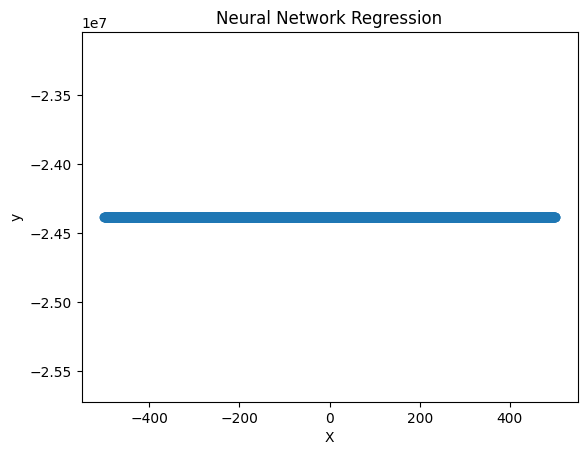

In [37]:
# 可视化结果
plt.scatter(X_test, preds)
# plt.plot(X_test, nn.sequential(X_test.T).flatten(), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Neural Network Regression')
plt.show()